In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.lib.display import YouTubeVideo
%matplotlib inline

# Eurovision Song Contest Dataset
### Contestant and Voting Data
This is a notebook accompanying the Eurovision Song Contest Dataset, containing the rankings, country-to-country votes, song metadata, lyrics and video/audio data for all songs that competed in the Eurovision Song Contests.


## Contestants Data

Columns:
```
year (contest year)
from_country_id (country id of contestant)
from_country (country name of contestant)
performer (artist)
song (title of the contestant's song)
sf_num (participated in semi-final 1, 2 or 0 (from 2004-2008 there was only one semi-final)
running_final (order in the broadcast of the contest's final)
running_sf (order in the broadcast of the contest's semi-final)
place_final (place in the final)
points_final (points in the final)
place_sf (place in the semi-final)
points_sf (points in the semi-final)
points_tele_final (televoting points in the contest's final)
points_jury_final (juryvoting points in the contest's final)
points_tele_sf (televoting points in the contest's semi-final)
points_jury_sf (juryvoting points in the contest's semi-final)
lyrics (lyrics of the song)
youtube_url (url to video on YouTube)
```

### Load data

In [150]:
contestants = pd.read_csv('contestants.csv')
contestants = contestants.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\\n',  '\n', regex=True)  # replace \\n with \n for newline prints

In [151]:
print('There are {} contestants in Eurovision Song Contests from {} to {}'.format(len(contestants), contestants['year'].min(), contestants['year'].max()))

There are 1562 contestants in Eurovision Song Contests from 1956 to 2019


### All countries

In [152]:
print(set(contestants['from_country']))

{'Poland', 'Monaco', 'Sweden', 'Belarus', 'Moldova', 'Slovenia', 'Cyprus', 'Belgium', 'Iceland', 'San Marino', 'Andorra', 'Italy', 'Turkey', 'Montenegro', 'Ireland', 'United KingdomUK', 'Norway', 'Armenia', 'Finland', 'Bulgaria', 'Germany', 'Azerbaijan', 'Spain', 'Serbia', 'Netherlands', 'Austria', 'Ukraine', 'Switzerland', 'Morocco', 'Georgia', 'Estonia', 'Latvia', 'Greece', 'Bosnia & Herzegovina', 'France', 'Czech Republic', 'Denmark', 'Yugoslavia', 'Portugal', 'Albania', 'Israel', 'Australia', 'Russia', 'North MacedoniaNorth MacedoniaN.Macedonia', 'Croatia', 'Hungary', 'Malta', 'Lithuania', 'Slovakia', 'Luxembourg', 'Romania', 'Serbia & Montenegro'}


### Helper functions

In [153]:
def get_contestants(year, country):
    return contestants[(contestants['year'] == year) & (contestants['from_country'] == country)]

## Examples

### Get contestant by year and country
Show song title, lyric and YouTube video

I Can't Go On
Performed by: Robin Bengtsson
-------
I can't go on
I can't go on 
Gotta keep it together 

Don't get me wrong 
Don't get me wrong 
Cause baby you make me better

Hey 

With just one look you make me shiver 
I just wanna take you home 
Wanna go OH 
Yeah I wanna go OOH 

Now girl you make me a believer  
I wanna take off all my clothes   
wanna go OH 
You make me wanna go OH

I just can't go on no more 
When you look this freakin' beautiful

ooh 

Hands down to the floor my love 
And I'm doing  
Whatever you want

I can't go on I can't go on  
When you look this freakin' beautiful  
I can't go on I can't go on  
When you look this freakin' beautiful

You've got me good 
You've got me good 
And I'm not going nowhere

Right in your hook 
That's understood 
But Im take you to somewhere

I just can't go on no more 
When you look this freakin' beautiful

Hands down to the floor my love 
And I'm doing  
Whatever you want

I can't go on I can't go on  
When you look this freakin'

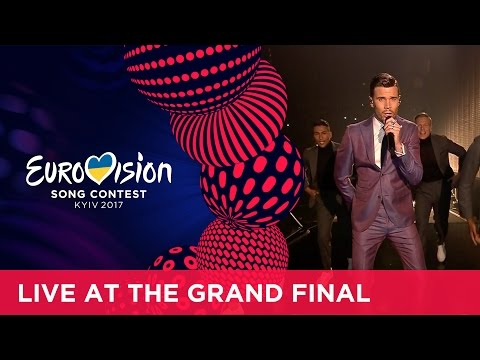

In [157]:
year = 2017
country = 'Sweden'

contestant = get_contestants(year, country)
# print('There were {} contestant(s) this year'.format(len(contestant)))

song_title = contestant['song'].values[0]
performer = contestant['performer'].values[0]
lyric = contestant['lyrics'].values[0]
youtube = contestant['youtube_url'].values[0]

print(song_title)
print('Performed by: {}'.format(performer))
print('-------')
print(lyric)
print(youtube)
YouTubeVideo(youtube.split('=')[-1])

In [158]:
contestant

,year,from_country_id,from_country,performer,song,sf_num,running_final,running_sf,place_final,points_final,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
1440,2017,se,Sweden,Robin Bengtsson,I Can't Go On,1.0,24.0,1.0,5.0,344,3.0,227.0,126.0,218.0,103.0,124.0,David Kreuger;K-One;Robin Stjernberg,David Kreuger;K-One;Robin Stjernberg,I can't go on\nI can't go on \nGotta keep it t...,https://youtube.com/watch?v=RjH_4oYqLw4


### Composers and Lyricists

In [159]:
contestants[['year', 'composers', 'lyricists']]

,year,composers,lyricists
0,1956,Georg Benz Stahl,Georg Benz Stahl
1,1956,Cor Lemaire,Annie M. G. Schmidt
2,1956,Jacques Say;Jean Miret,Robert Montal
3,1956,Walter Andreas Schwarz,Walter Andreas Schwarz
4,1956,André Lodge,Rachèle Thoreau
...,...,...,...
1557,2019,Jacques Houdek,Andrea Čubrić;Charlie Mason;Jacques Houdek
1558,2019,Mārcis Vasiļevskis,Sabīne Žuga
1559,2019,Lost Capital;Tokionine,Garik Papoyan
1560,2019,Pænda,Pænda


In [145]:
composers = []
for i, row in contestants.iterrows():
    y = row['year']
    cs = row['composers'].split(';')
    for c in cs:
        composers.append([y, c])
composers = pd.DataFrame(composers, columns=['year', 'composer'])

In [146]:
lyricists = []
for i, row in contestants.iterrows():
    y = row['year']
    cs = row['lyricists'].split(';')
    for c in cs:
        lyricists.append([y, c])
lyricists = pd.DataFrame(lyricists, columns=['year', 'lyricist'])

In [147]:
composers

,year,composer
0,1956,Georg Benz Stahl
1,1956,Cor Lemaire
2,1956,Jacques Say
3,1956,Jean Miret
4,1956,Walter Andreas Schwarz
...,...,...
2356,2019,Tokionine
2357,2019,Pænda
2358,2019,Janieck Devy
2359,2019,Misha


In [135]:
lyricists

,year,lyricist
0,1956,Georg Benz Stahl
1,1956,Annie M. G. Schmidt
2,1956,Robert Montal
3,1956,Walter Andreas Schwarz
4,1956,Rachèle Thoreau
...,...,...
1878,2014,Rasmus Palmgren
1879,2014,Darko Dimitrov
1880,2014,Elena Risteska Ivanovska
1881,2014,Rami Talmid


In [136]:
composers['composer'].value_counts().plot(kind='bar')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x121120440> (for post_execute):


ValueError: 
DJ BE$$
     ^
Expected end of text, found '$'  (at char 5), (line:1, col:6)

ValueError: 
DJ BE$$
     ^
Expected end of text, found '$'  (at char 5), (line:1, col:6)

<Figure size 432x288 with 1 Axes>

### Plots

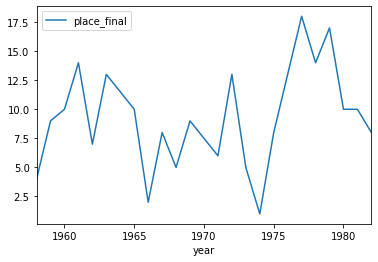

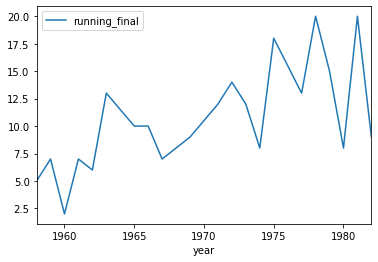

In [123]:
country = 'Sweden'
contestants[contestants['from_country'] == country].plot('year', 'place_final', kind='line')
contestants[contestants['from_country'] == country].plot('year', 'running_final', kind='line')

# Voting Data

In [9]:
votes = pd.read_csv('votes.csv')

In [12]:
votes.head(1000)

,year,round,from_country_id,to_country_id,from_country,to_country,points
0,1957,final,at,nl,Austria,Netherlands,6
1,1957,final,at,fr,Austria,France,0
2,1957,final,at,dk,Austria,Denmark,0
3,1957,final,at,lu,Austria,Luxembourg,3
4,1957,final,at,de,Austria,Germany,0
...,...,...,...,...,...,...,...
995,1962,final,yu,dk,Yugoslavia,Denmark,0
996,1962,final,yu,no,Yugoslavia,Norway,0
997,1962,final,yu,ch,Yugoslavia,Switzerland,0
998,1962,final,yu,be,Yugoslavia,Belgium,0


In [112]:
def vote_grid(year):
    return votes[votes['year'] == year].pivot_table('points', 'from_country', 'to_country', aggfunc=np.sum, fill_value=0)

def get_received_votes(year, to_country):
    return votes[(votes['year'] == year) & (votes['to_country'] == to_country)]

def get_votes_from_to(year, from_country, to_country):
    return votes[(votes['year'] == year) & (votes['from_country'] == from_country) & (votes['to_country'] == to_country)]

def get_all_points(year, from_country, to_country):
    return get_votes_from_to(year, from_country, to_country)['points'].sum()

### Examples

In [113]:
from_country = 'United Kingdom'
to_country = 'Netherlands'

v = get_votes_from_to(2019, from_country, to_country)
print(v)

v = get_all_points(2019, from_country, to_country)
print(v)

       year         round from_country_id to_country_id    from_country  \
46263  2019         final              gb            nl  United Kingdom   
46989  2019  semi-final-2              gb            nl  United Kingdom   

        to_country  points  
46263  Netherlands      10  
46989  Netherlands       7  
17


### Voting grid / heatmap

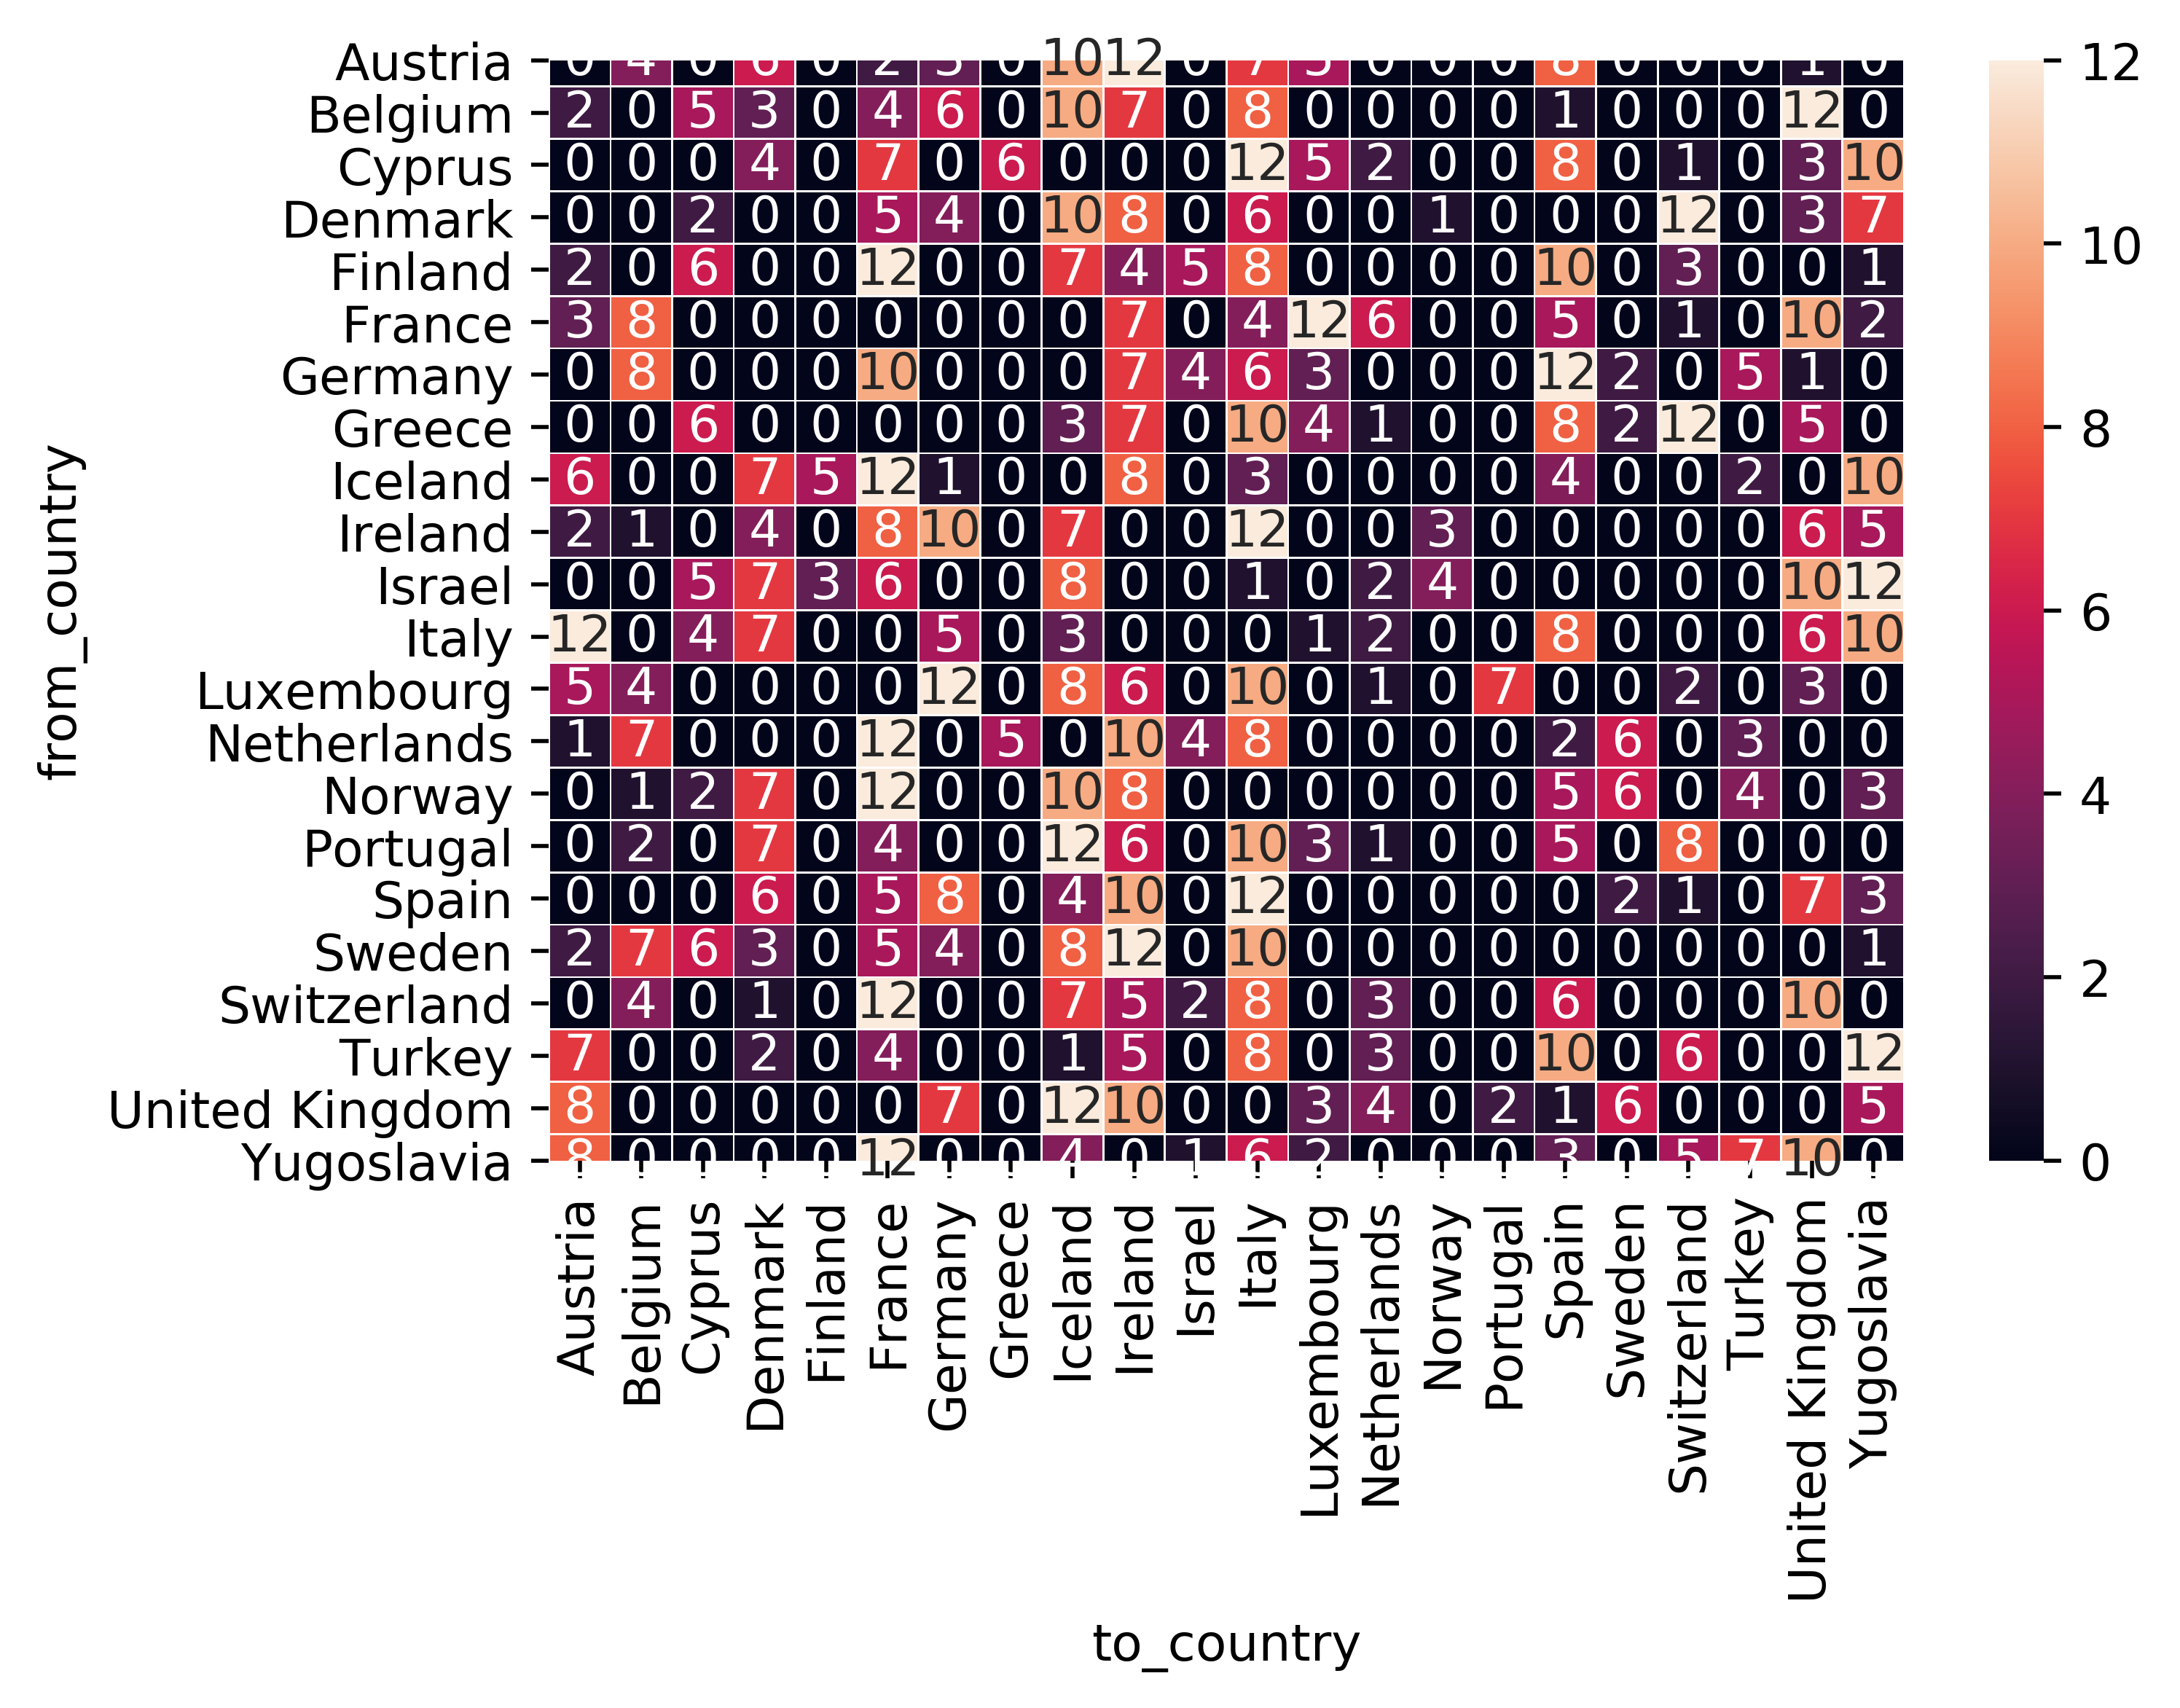

In [132]:
grid = vote_grid(1990)

with sns.plotting_context(font_scale=0.1):
    f, ax = plt.subplots(dpi=500)
    sns.heatmap(grid, annot=True, linewidths=0.25, ax=ax, xticklabels=True, yticklabels=True)

In [134]:
grid

to_country,Austria,Belgium,Cyprus,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,...,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,Yugoslavia
from_country,,,,,,,,,,,,,,,,,,,,,
Austria,0,4,0,6,0,2,3,0,10,12,...,5,0,0,0,8,0,0,0,1,0
Belgium,2,0,5,3,0,4,6,0,10,7,...,0,0,0,0,1,0,0,0,12,0
Cyprus,0,0,0,4,0,7,0,6,0,0,...,5,2,0,0,8,0,1,0,3,10
Denmark,0,0,2,0,0,5,4,0,10,8,...,0,0,1,0,0,0,12,0,3,7
Finland,2,0,6,0,0,12,0,0,7,4,...,0,0,0,0,10,0,3,0,0,1
France,3,8,0,0,0,0,0,0,0,7,...,12,6,0,0,5,0,1,0,10,2
Germany,0,8,0,0,0,10,0,0,0,7,...,3,0,0,0,12,2,0,5,1,0
Greece,0,0,6,0,0,0,0,0,3,7,...,4,1,0,0,8,2,12,0,5,0
Iceland,6,0,0,7,5,12,1,0,0,8,...,0,0,0,0,4,0,0,2,0,10
